# Librerias básicas de Python

Un módulo o module en Python es un fichero `.py` que alberga un conjunto de funciones, variables o clases y que puede ser usado por otros módulos. Por ejemplo, podemos definir un módulo llamado `mimodulo.py` con dos funciones: `suma()` y `resta()`.

In [ ]:
# mimodulo.py
def suma(a, b):
    return a + b

def resta(a, b):
    return a - b


Una vez definido, dicho módulo puede ser usado o importado en otro fichero, como mostramos a continuación. Usando `import` podemos importar todo el contenido.

In [ ]:
# otromodulo.py
import mimodulo

print(mimodulo.suma(4, 3))   # 7
print(mimodulo.resta(10, 9)) # 1

## Pandas

Pandas es una libreria de python que permite representar datos mediante tablas. Lo cual permite manipular y analizar datos de manera visual. Cuando se usa Pandas, una tabla de datos se llama `DataFrame` y está compusta por `Series`que representan **columnas** con el mismo número de **filas**.

<img src="https://raw.githubusercontent.com/jorge774/Img/refs/heads/main/pandas.png" alt="Drawing" style="width:700px;">

In [ ]:
import pandas as pd#importamos la libreria a nuestro entorno

ciudades = pd.Series(['Bucaramanga', 'Bogotá', 'Málaga','Medellin','Cali'])#serie que contiene nombre de cuidades
poblacion_col = pd.Series([605047,7907000,19884,2569000,2234000])#serie que contiene la poblacion de cuidades
altura= pd.Series([900,2800,2200,1400,1000])
miprimerdata = pd.DataFrame({ 'Ciudades':ciudades,'Poblacion':poblacion_col,'Altura':altura})
miprimerdata.set_index('Ciudades',inplace=True)
miprimerdata

Poblacion  Altura
Ciudades                      
Bucaramanga     605047     900
Bogotá         7907000    2800
Málaga           19884    2200
Medellin       2569000    1400
Cali           2234000    1000

Una de las ventajas de usar Pandas es que permite guardar los `DataFrame` en archivos de texto con formato `csv`

In [ ]:
miprimerdata.to_csv('miprimerdata.csv', index=True)

Y tambien permite cargarlos al entorno donde se está trabajando.

In [ ]:
datos_cargados=pd.read_csv('miprimerdata.csv')
datos_cargados.set_index('Ciudades',inplace=True)
datos_cargados

Poblacion  Altura
Ciudades                      
Bucaramanga     605047     900
Bogotá         7907000    2800
Málaga           19884    2200
Medellin       2569000    1400
Cali           2234000    1000

Como se decia en la definicion, pandas permite manipular datos de manera visual

In [ ]:
#acceder a toda la informacion disponible para la fila Bucaramanga
datos_cargados.loc['Bucaramanga']

Poblacion    605047
Altura          900
Name: Bucaramanga, dtype: int64

In [ ]:
#nos arroja que filas del dataframe cumplen la condicion de poblacion>1000000
(datos_cargados['Poblacion']>1000000)

Ciudades
Bucaramanga    False
Bogotá          True
Málaga         False
Medellin        True
Cali            True
Name: Poblacion, dtype: bool

In [ ]:
#nos arroja que filas del dataframe cumplen la condicion de 0<poblacion<20000000 (poblacion entre 2 millones y 3 millones)
(datos_cargados['Poblacion']>1000000)&(datos_cargados['Poblacion']<3000000)

Ciudades
Bucaramanga    False
Bogotá         False
Málaga         False
Medellin        True
Cali            True
Name: Poblacion, dtype: bool

In [ ]:
#obtener el valor maximo en la culumna poblacion
datos_cargados['Poblacion'].max()

7907000

In [ ]:
#obtener la cuidad con ese valor maximo de poblacion
(datos_cargados['Poblacion']==datos_cargados['Poblacion'].max())

Ciudades
Bucaramanga    False
Bogotá          True
Málaga         False
Medellin       False
Cali           False
Name: Poblacion, dtype: bool

Lo anterior nos permite entonces filtrar nuestros datos de forma eficiente

In [ ]:
datos_cargados[(datos_cargados['Poblacion']>1000000)]

Poblacion  Altura
Ciudades                   
Bogotá      7907000    2800
Medellin    2569000    1400
Cali        2234000    1000

In [ ]:
datos_cargados[(datos_cargados['Poblacion']>1000000)&(datos_cargados['Poblacion']>2000000)]

Poblacion  Altura
Ciudades                   
Bogotá      7907000    2800
Medellin    2569000    1400
Cali        2234000    1000

In [ ]:
datos_cargados[(datos_cargados['Poblacion']==datos_cargados['Poblacion'].max())]

Poblacion  Altura
Ciudades                   
Bogotá      7907000    2800

Pandas tambien permite graficar directamente desde el `DataFrame`

<Axes: title={'center': 'Ciudad vs Poblacion'}, xlabel='Ciudad', ylabel='Poblacion'>

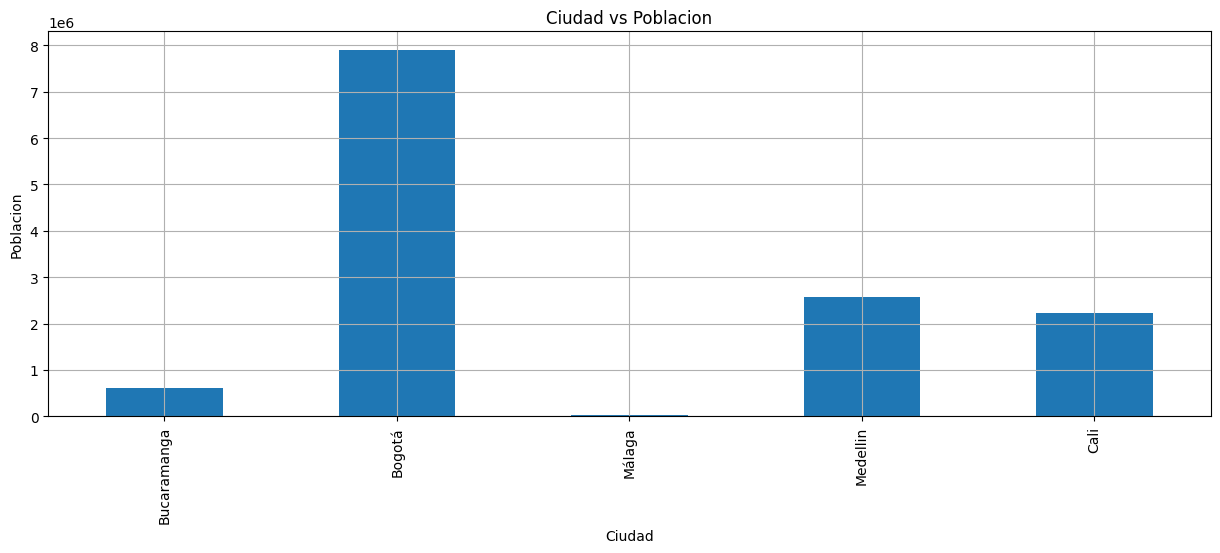

In [ ]:
#kind puede ser line,bar,barh,hist,pie
datos_cargados["Poblacion"].plot(grid=True,kind="bar",title='Ciudad vs Poblacion',figsize=(15,5),xlabel='Ciudad',ylabel='Poblacion')

#**Visualizando y analizando datos reales**

Para esta parte de la clase usaremos los datos meteorológicos recolectados por una estación de monitoreo meteorológico llamada eva y que está situada en la UIS.

<img src="https://github.com/jorge774/Img/blob/main/eva.png?raw=true" alt="Drawing" style="width:700px;">

In [ ]:
#inatalamos la libreria necesaria para descargar los datos de la estacion
!pip install APIMakeSens

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 9.0 MB/s eta 0:00:00
  Created wheel for APIMakeSens: filename=APIMakeSens-1.4.8-py3-none-any.whl size=19669 sha256=1c573d418d3dcbeb1bd364fc74582d90d6ea1af53909a0b6939fbe114e1db0ca
  Stored in directory: /root/.cache/pip/wheels/86/5a/28/0d6b05a7f54e48cbffcf89892da31a54238d562bcb85662cc5
Successfully built APIMakeSens


In [ ]:
#descargamos los datos
from MakeSens import MakeSens
#download_data(id_device,start_date,end_date, sample_rate, logs = False,data_type = 'RAW',file_format=None,fields=None)
datos = MakeSens.download_data(id_device='E2_00021',start_date='2024-09-01 00:00:00',end_date='2024-09-30 23:59:59',sample_rate='1T',fields="temperatura,presion,humedad")

/usr/local/lib/python3.10/dist-packages/MakeSens/MakeSens.py:104: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  dataframe_data = dataframe_data.resample(sample_rate).mean()


In [ ]:
datos.head(20)

humedad     presion  temperatura
ts                                                     
2024-09-19 15:09:00  62.776527  903.217529    27.376667
2024-09-19 15:10:00  62.030273  903.204834    27.479998
2024-09-19 15:11:00  61.586670  903.197327    27.550835
2024-09-19 15:12:00  61.057049  903.180176    27.617500
2024-09-19 15:13:00  60.898602  903.164734    27.687500
2024-09-19 15:14:00  60.767170  903.147644    27.759996
2024-09-19 15:15:00  60.381916  903.160645    27.831667
2024-09-19 15:16:00  60.333984  903.138000    27.905832
2024-09-19 15:17:00  60.283123  903.140808    27.974997
2024-09-19 15:18:00  60.315350  903.151428    28.050837
2024-09-19 15:19:00  60.121746  903.149658    28.105001
2024-09-19 15:20:00  60.008789  903.137268    28.163332
2024-09-19 15:21:00  59.890625  903.141907    28.235832
2024-09-19 15:22:00  59.625896  903.094910    28.286669
2024-09-19 15:23:00  59.591228  903.057800    28.359167
2024-09-19 15:24:00  59.375488  903.000244    28.425833
2024-09-19 15:25:00  58.913250  902.982666    28.485832
2024-09-19 15:26:00        NaN         NaN          NaN
2024-09-19 15:27:00  58.628989  902.959564    28.562084
2024-09-19 15:28:00  58.646809  902.913391    28.662498

In [ ]:
#el dataframe contiene 16167 filas
datos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16371 entries, 2024-09-19 15:09:00 to 2024-09-30 23:59:00
Freq: min
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   humedad      16167 non-null  float64
 1   presion      16167 non-null  float64
 2   temperatura  16167 non-null  float64
dtypes: float64(3)
memory usage: 511.6 KB


<Axes: title={'center': 'Fecha vs Temperatura'}, xlabel='Fecha', ylabel='Temperatura[°c]'>

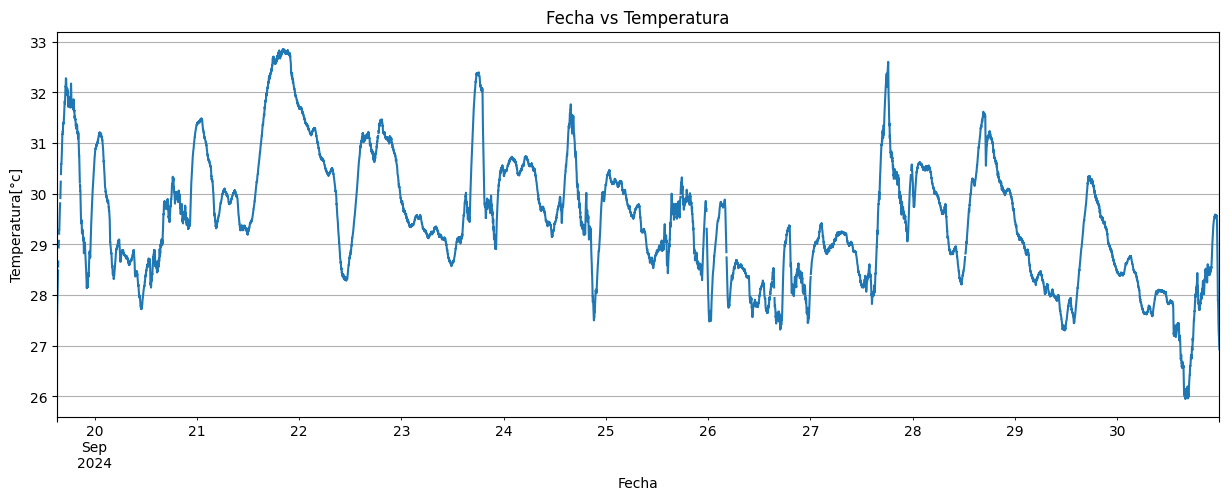

In [ ]:
#graficamos los datos de fecha vs temperatura
datos['temperatura'].plot(grid=True,title='Fecha vs Temperatura',figsize=(15,5),xlabel='Fecha',ylabel='Temperatura[°c]')

#**Preguntas**

##  1. ¿Cual es la temperatura maxima registrada?. ¿En que dia se registró?

##  2. ¿Cual es la temperatura minima registrada?. ¿En que dia se registró?

## 3. ¿Cual es la temperatura promedio de los datos mostrado en la grafica anterior?